In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import clean_data
import helpers
import analysis
import figures


# Preamble

With the anticipation of Monster Hunter Rise, I wanted to take a look at the previous games in the Monster Hunter series. Monster Hunter is a series of video games made by Capcom that you play as a hunter that hunts various different and unique monsters. Large monsters act as "bosses" so the more monsters, the more potential playtime of the title. Each new installment brings new monsters, new ways to hunt the monsters and also brings older monsters from previous games. when a base version of a title is released, it followed by a sequel (known as a ultimate expansion of the base game). (with the exception of Portable 3rd). Ultimate expansions brings more monsters.




# Importing the Data

There are 3 csv files that I prepared that includes data such as monsters in each games, specific monster data, and title information. 

most of the data was collected using [MonsterHunter.Fandom](https://monsterhunter.fandom.com/wiki/Monster_Hunter_Wiki)

In [2]:
mh_data = clean_data.get_data()
mh_data

,Name,Type,Size,Title,Country Released,Date Released,Generation,Director,Console
0,Abyssal Lagiacrus,Leviathan,Large,Monster Hunter 3 Ultimate,JPN,2011-12-10,3,Kaname Fujioka,3DS
1,Abyssal Lagiacrus,Leviathan,Large,Monster Hunter 3 Ultimate,North America,2013-03-19,3,Kaname Fujioka,3DS
2,Agnaktor,Leviathan,Large,Monster Hunter 3 Ultimate,JPN,2011-12-10,3,Kaname Fujioka,3DS
3,Agnaktor,Leviathan,Large,Monster Hunter 3 Ultimate,North America,2013-03-19,3,Kaname Fujioka,3DS
4,Alatreon,Elder Dragon,Large,Monster Hunter 3 Ultimate,JPN,2011-12-10,3,Kaname Fujioka,3DS
...,...,...,...,...,...,...,...,...,...
2496,Vespoid,Neopteron,Small,Monster Hunter Freedom,North America,2006-05-23,1,Yasunori Ichinose,Playstation Portable
2497,White Monoblos,Flying Wyvern,Large,Monster Hunter Freedom,JPN,2005-12-01,1,Yasunori Ichinose,Playstation Portable
2498,White Monoblos,Flying Wyvern,Large,Monster Hunter Freedom,North America,2006-05-23,1,Yasunori Ichinose,Playstation Portable
2499,Yian Kut-Ku,Bird Wyvern,Large,Monster Hunter Freedom,JPN,2005-12-01,1,Yasunori Ichinose,Playstation Portable



## Amount of Monsters: Getting the Data

I wanted to see what how many monsters and what the proportion between new monsters to monster that were already introduced.

The analysis will be done on the following titles:
* Monster Hunter
* Monster Hunter Freedom 2
* Monster Hunter 3
* Monster Hunter Portable 3rd
* Monster Hunter 4
* Monster Hunter Generations
* Monster Hunter: World
* Monster Hunter Rise
* Monster Hunter Freedom
* Monster Hunter Freedom Unite
* Monster Hunter 3 Ultimate
* Monster Hunter 4 Ultimate
* Monster Hunter Generations Ultimate
* Monster Hunter World: Iceborne

We can filter the titles we want to analyze and for each title obtain:
* Amount of total monsters
* Amount of large monsters
* Amount of small monsters
* Amount of new monsters
* Amount of new large monsters
* Amount of new small monsters
* Amount of Variant/Subspecies/Deviants

in order to find the new monsters in the title, we need to get the list of monsters from the title and a list of monsters from all previous titles and take the difference of the previous monsters and the title monsters. 

The variants (which are generalization of subspecies/deviants/apex(Rise)) are retrieved by sorting a list of all the monsters names by string length and then iterating through the list from 1-n removing any that contains the shorter names which produces a list of non variant monsters. to get the variants we takes the difference of titles monsters and the non-variant title monsters.

see the [function](helpers.py) if interested





In [3]:
amt_analysis_titles = analysis.get_amt_titles_df()
amt_analysis_titles['Base'].append(amt_analysis_titles['Ultimate']).dropna()

Monster Hunter
Monster Hunter Freedom 2
Monster Hunter 3
Monster Hunter Portable 3rd
Monster Hunter 4
Monster Hunter Generations
Monster Hunter: World
Monster Hunter Rise
Monster Hunter Freedom
Monster Hunter Freedom Unite
Monster Hunter 3 Ultimate
Monster Hunter 4 Ultimate
Monster Hunter Generations Ultimate
Monster Hunter World: Iceborne


0    None
1    None
2    None
3    None
4    None
5    None
6    None
7    None
0    None
1    None
2    None
4    None
5    None
6    None
dtype: object

In [4]:
amt_analysis_titles_lst = amt_analysis_titles['Base'].append(amt_analysis_titles['Ultimate']).dropna()
titles_amt_data = mh_data[mh_data['Title'].isin(amt_analysis_titles_lst)==True]
amt_monsters_df = analysis.get_amt_table(amt_analysis_titles_lst,titles_amt_data)
amt_monsters_df[['Title','Total Monsters', 'Large Monsters','Small Monsters',
                      'New Monsters', 'New Large Monsters', 'New Small Monsters','Variant Monsters']]

,Title,Total Monsters,Large Monsters,Small Monsters,New Monsters,New Large Monsters,New Small Monsters,Variant Monsters
0,Monster Hunter,30,18,12,30,18,12,0
1,Monster Hunter Freedom,44,32,12,14,14,0,13
2,Monster Hunter Freedom 2,70,48,22,27,17,10,15
3,Monster Hunter Freedom Unite,81,59,22,11,11,0,20
4,Monster Hunter 3,35,20,15,26,16,10,0
5,Monster Hunter Portable 3rd,60,42,18,20,17,3,11
6,Monster Hunter 3 Ultimate,73,53,20,11,10,1,21
7,Monster Hunter 4,72,54,18,16,14,2,18
8,Monster Hunter 4 Ultimate,98,77,21,12,12,0,33
9,Monster Hunter Generations,105,73,32,22,19,3,16


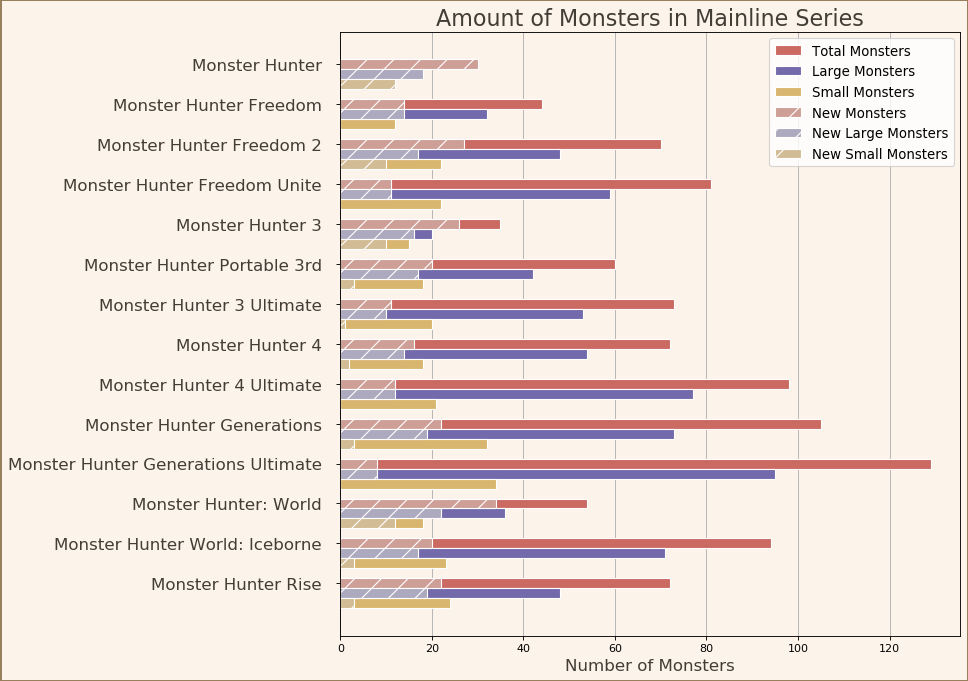

In [5]:
figures.make_amt_monsters(amt_monsters_df)


# Amount of Monsters: Analysis


The trends in the ratio of new monsters to total seems consisent over the series with the exception of Monster Hunter, Monster Hunter 3, and Monster Hunter Generations Ultimate. Monster Hunter is the first game and Monster Hunter Generations Ultimate was a title that the wanted to bring back monsters from the previous games which explains the high to low ratios. Monster Hunter 3 has a low total monsters but a high ratio of new monsters. 


In [6]:
print("Mean of New Monster Ratio: ",amt_monsters_df['New Monster Ratio'].mean())
print("Median of New Monster Ratio: ",amt_monsters_df['New Monster Ratio'].median())
print("\nMean of Variant Monster Ratio: ",amt_monsters_df['Variant Monster Ratio'].mean())
print("Median of Variant Monster Ratio: ",amt_monsters_df['Variant Monster Ratio'].median())
amt_monsters_df[['Title','New Monster Ratio','Variant Monster Ratio']] 

Mean of New Monster Ratio:  0.3841083909187422
Median of New Monster Ratio:  0.3072203196347032

Mean of Variant Monster Ratio:  0.2514399814116347
Median of Variant Monster Ratio:  0.287828947368421


,Title,New Monster Ratio,Variant Monster Ratio
0,Monster Hunter,1,0
1,Monster Hunter Freedom,0.4375,0.40625
2,Monster Hunter Freedom 2,0.354167,0.3125
3,Monster Hunter Freedom Unite,0.186441,0.338983
4,Monster Hunter 3,0.8,0
5,Monster Hunter Portable 3rd,0.404762,0.261905
6,Monster Hunter 3 Ultimate,0.188679,0.396226
7,Monster Hunter 4,0.259259,0.333333
8,Monster Hunter 4 Ultimate,0.155844,0.428571
9,Monster Hunter Generations,0.260274,0.219178



# Monsters Throughout the Series

We will be analyzing the same titles as the amount of monsters.

The monsters with the most occurances throughout the series is **Rathalos** and **Rathian** which have shown up in all analysis titles.

Rathalos  | Rathian
:-------------------------:|:----------------------:
![Rathalo](Resources/MHRise-Rathalos_Render_003.png) | ![Rathian](Resources/Rathian_Transparent01.png)

*Images from MonsterHunter.fandom*


In [7]:
monster_occurance_data = mh_data[mh_data['Title'].isin(amt_analysis_titles_lst) == True].sort_values(by=['Date Released']).drop_duplicates(subset=['Title','Name'],keep='first')
monster_occurance_data = monster_occurance_data[monster_occurance_data['Size'] == "Large"].groupby(['Name'])['Type'].count().sort_values(ascending=False)
monster_occurance_data.head(10)

Name
Rathian            14
Rathalos           14
Diablos            12
Felyne             12
Silver Rathalos    10
Gold Rathian       10
Kirin              10
Teostra             9
Tigrex              9
Kushala Daora       9
Name: Type, dtype: int64

### Sorting monsters to Directors
I want to find if a director is more likely to use monsters that they have introduced
I want to get the data to have the relavant titles
total_new_monsters

In [8]:
# title_data = mh_data[mh_data['Title'].isin(analysis_titles_lst) == True]
# filter_exclude_jpn = title_data['Country Released'] != 'JPN'
# filter_title_except = title_data['Title'] == 'Monster Hunter Portable 3rd'
# filter_large = title_data['Size'] == 'Large'

# title_data_p1 = title_data.where(filter_exclude_jpn & filter_large).dropna()
# title_data_p2 = title_data.where(filter_title_except & filter_large).dropna()
# title_data = pd.concat([title_data_p1,title_data_p2])

# title_data[['Title','Director']].drop_duplicates(subset='Title').groupby('Director').count()
# director_data = title_data.sort_values(by=['Name','Date Released']).drop_duplicates(subset=['Name'],keep='first')
# director_data[director_data['Director'] == 'Kaname Fujioka']
# Kaname_monsters = director_data[director_data['Director'] == 'Kaname Fujioka']
# Yasunori_monsters = director_data[director_data['Director'] == 'Yasunori Ichinose']


# Base Vs Ultimate?

Another question is how many months between a base game and the ultimate release. with the ultimate realease, it brings more monsters and more things to do!  

To find the amount of months between the version, I will use the japan release titles, the reason is titles were released in japan monsths before coming to the west.  

In [9]:
game_titles = analysis.get_base_ultimate_titles()
base_ultimate = analysis.get_base_ultimate_df(game_titles, mh_data)
print("Mean of time between games",base_ultimate['date_difference'].mean().days/30.5)
print("Median of time between games",base_ultimate['date_difference'].median().days/30.5)
base_ultimate

Mean of time between games 16.557377049180328
Median of time between games 14.327868852459016


,Title_base,Date Released_base,Large Monsters_base,Title_ultimate,Date Released_ultimate,Large Monsters_ultimate,date_difference,monster_difference
0,Monster Hunter,2004-03-11,18,Monster Hunter G,2005-01-20,28,315 days,10
1,Monster Hunter Freedom 2,2007-02-22,48,Monster Hunter Freedom Unite,2008-03-27,59,399 days,11
2,Monster Hunter 3,2009-08-01,20,Monster Hunter 3 Ultimate,2011-12-10,53,861 days,33
3,Monster Hunter 4,2013-09-14,54,Monster Hunter 4 G,2014-10-11,77,392 days,23
4,Monster Hunter X,2015-11-28,73,Monster Hunter XX,2017-03-18,95,476 days,22
5,Monster Hunter: World,2018-01-26,36,Monster Hunter World: Iceborne,2019-09-06,71,588 days,35



# When will Rise Ultimate Release?!?

we can hope that it will be released in 14-15 months on 

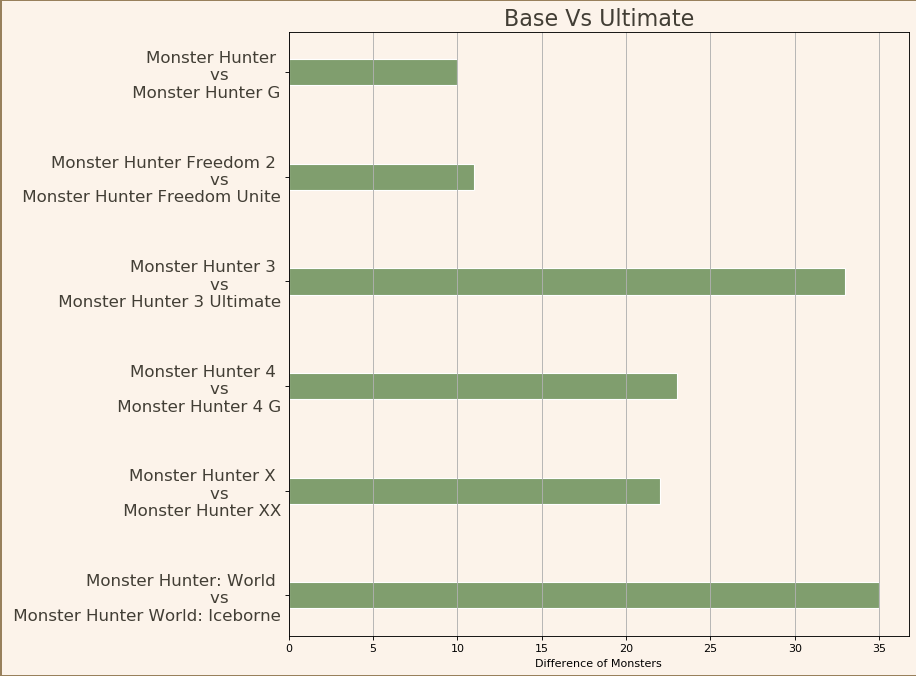

In [10]:
figures.make_base_ultimate(base_ultimate)